In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from rdkit import Chem
from ast import literal_eval
from collections import Counter

In [12]:
# plot tsne using matplotlib
def plot_tsne(df, color_by):

    # clear plot
    plt.clf()
    # plot tsne, coloring dots that contain the term color_by in the set df["summarizations"]
    
    # create figure, plotting non-color_by labels in gray
    plt.scatter(df[df['summarizations'].apply(lambda x: color_by not in x)]['fp_tsne_x'],
                df[df['summarizations'].apply(lambda x: color_by not in x)]['fp_tsne_y'],
                c="gray",
                # marker=".",
                s=1,
                edgecolors="none",
    )
    
    # # overlay with red colored dots for color_by
    plt.scatter(df[df['summarizations'].apply(lambda x: color_by in x)]['fp_tsne_x'],
                df[df['summarizations'].apply(lambda x: color_by in x)]['fp_tsne_y'],
                c="red",
                # marker=".",
                s=1,
                edgecolors="none",
    )

    # add labels
    plt.xlabel("tsne_x")
    plt.ylabel("tsne_y")
    plt.title("tsne colored by " + color_by)

    # save plot
    plt.savefig("fp_tsne_s42_p50_jacc_" + color_by + ".png", dpi=600, bbox_inches='tight')

In [7]:
df = pd.read_pickle("schembl_summs_v4_final_with_fingerprint_tsne.pkl")
df["summarizations"] = df["summarizations"].apply(literal_eval)

In [8]:
all_terms = Counter()
for i in df["summarizations"]:
    all_terms.update(i)

for term, count in all_terms.most_common():
    print(term, count)

inhibitor 36218
treatment 32390
disease 16009
compound 14648
derivative 13039
cancer 11359
receptor 9917
disorder 9318
modulator 8468
agent 7618
therapeutic 7333
antagonist 7210
kinase 6982
composition 6259
pharmaceutical 5838
organic 5089
agonist 4433
inflammatory 4232
protein 4178
inhibitory 3712
activity 3689
device 3572
acid 3293
antiviral 3098
cell 2919
pain 2833
diabetes 2799
inhibition 2778
therapy 2754
anti-inflammatory 2626
high 2505
heterocyclic 2495
prevention 2370
antibacterial 2259
cardiovascular 2148
medicament 2088
material 2062
drug 2043
synthesis 1986
autoimmune 1979
treating 1882
inflammation 1824
control 1822
obesity 1773
efficiency 1773
electroluminescent 1726
pharmacological 1706
neurodegenerative 1706
novel 1676
light-emitting 1663
metabolic 1663
selective 1630
alzheimer's 1545
light 1520
protease 1519
channel 1507
ligand 1454
substituted 1449
neurological 1448
modulation 1442
infection 1437
hiv 1363
regulation 1354
production 1352
analgesic 1343
intermediate 1334

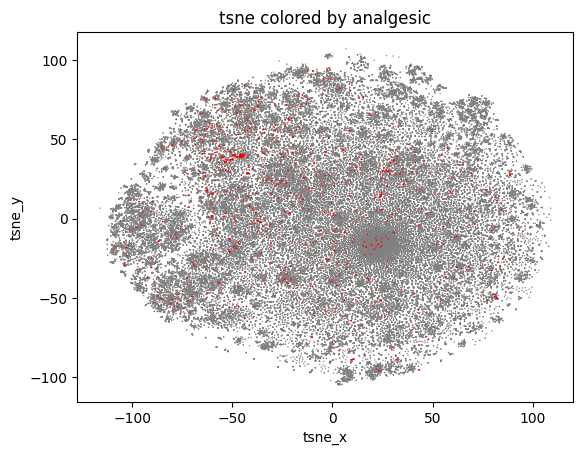

In [13]:
plot_tsne(df, "opioid")
plot_tsne(df, "antibiotic")
plot_tsne(df, "protease")
plot_tsne(df, "peptidase")
plot_tsne(df, "antiviral")
plot_tsne(df, "antipsychotic")
plot_tsne(df, "serotonin")
plot_tsne(df, '5-ht')
plot_tsne(df, 'kinase')
plot_tsne(df, 'cancer')
plot_tsne(df, 'diabetes')
plot_tsne(df, 'antibacterial')
plot_tsne(df, "alzheimer's")
plot_tsne(df, "neurological")
plot_tsne(df, "infection")
plot_tsne(df, "hiv")
plot_tsne(df, "analgesic")
